In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import deque
import numpy as np
import random
import matplotlib.pyplot as plt


***QUESTION A***

Acceptance Rate: 0.407052


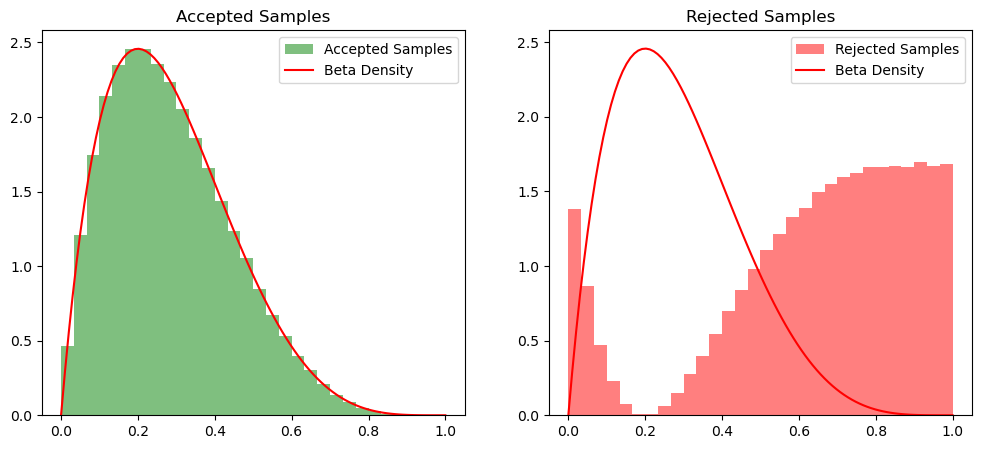

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

def betaDensityFunction(x, alpha, beta):
    #Likelihood of observing the random variable X at sn specific value x in the beta distribution
    pdf = (x**(alpha-1) * (1-x)**(beta-1) )/( (scipy.special.gamma(alpha) * scipy.special.gamma(beta) )/scipy.special.gamma(alpha+beta))
    #pdf = 30*x*((1-x)**4)
    return pdf

def majorizing_function(x):
    #g(x)
    return 1

def acceptance_rejection(alphaParameter, betaParameter, num_samples):
    accepted_samples = []
    rejected_samples = []
    M = 2.4576
    for _ in range(num_samples):
        # Used to decide whether to accept or reject the sample.
        u = np.random.uniform(0, 1)
        #Sample from the proposal distribution. Candidate for being a sample from the target distribution. 
        x = np.random.uniform(0, 1)
        acceptance_prob = betaDensityFunction(x, alphaParameter, betaParameter) / (M * majorizing_function(x))
        if u <= acceptance_prob:
            accepted_samples.append(x)
        else:
            rejected_samples.append(x)


    acceptance_rate = len(accepted_samples) / num_samples
    return np.array(accepted_samples), np.array(rejected_samples), acceptance_rate

alpha = 2
beta = 5
num_samples = 1000000
accepted_samples, rejected_samples, acceptance_rate = acceptance_rejection(alpha, beta, num_samples)

print(f"Acceptance Rate: {acceptance_rate}")

# Plot the results
plt.figure(figsize=(12, 5))

# Plot accepted samples in green
plt.subplot(1, 2, 1)
plt.hist(accepted_samples, bins=30, density=True, alpha=0.5, color='green', label='Accepted Samples', range=(0, 1))
x_values = np.linspace(0, 1, 100)
plt.plot(x_values, betaDensityFunction(x_values, alpha, beta), 'r-', label='Beta Density')
plt.title('Accepted Samples')
plt.legend()

# Plot rejected samples in red
plt.subplot(1, 2, 2)
plt.hist(rejected_samples, bins=30, density=True, alpha=0.5, color='red', label='Rejected Samples')
x_values = np.linspace(0, 1, 100)
plt.plot(x_values, betaDensityFunction(x_values, alpha, beta), 'r-', label='Beta Density')
plt.title('Rejected Samples')
plt.legend()

plt.show()

---

***QUESTION B***

In [5]:
# question b
def lamp_on_off(matrix):
    def is_valid(node):
        x, y = node
        return 0 <= x < len(matrix) and 0 <= y < len(matrix[0]) and matrix[x][y] == 1

    def get_neighbors(node):
        x, y = node
        directions = [(0, 1), (1, 0), (-1, 0)]  # Right, Down, Up
        neighbors = [(x + dx, y + dy) for dx, dy in directions]
        return [n for n in neighbors if is_valid(n)]

    def search_path(start):
        end_column = len(matrix[0]) - 1
        queue = deque([start])
        visited = set()
        while queue:
            node = queue.popleft()
            if node in visited:
                continue
            visited.add(node)
            if node[1] == end_column:  # Check if we've reached the last column
                return True
            for neighbor in get_neighbors(node):
                if neighbor not in visited:
                    queue.append(neighbor)
        return False

    # Check for a path from each conductive position in the first column
    for x in range(len(matrix)):
        if matrix[x][0] == 1:  # Start only from conductive cells in the first column
            start = (x, 0)
            if search_path(start):
                return 'On'
    return 'Off'



# Lamp On/Off Function Explanation

The function `lamp_on_off(matrix)` is designed to determine if there is a conductive path from the first to the last column of a given matrix. This matrix represents a circuit where each cell contains either a 1 (indicating a conductive part) or a 0 (indicating a non-conductive part). The function aims to find out whether it's possible to travel from the leftmost column to the rightmost column by moving through conductive cells (1s) only. The allowed movements are right, down, and up.

## Breakdown of the Function

1. **Nested Functions**:
    - `is_valid(node)`: Checks if a given cell (node) is within the bounds of the matrix and is conductive (i.e., has a value of 1).
    - `get_neighbors(node)`: For a given cell, it finds all neighboring cells that can be reached by moving right, down, or up. It filters out any invalid or non-conductive neighbors.
    - `search_path(start)`: Implements a search algorithm to find a path from the `start` cell to any cell in the last column. This function uses a queue to explore the nodes in the order they are discovered. If it reaches a cell in the last column, it returns `True`, indicating a conductive path exists.

2. **Main Logic**:
    - The function iterates through each cell in the first column of the matrix. If a cell is conductive (has a value of 1), it uses the `search_path` function to check if there is a path from that cell to the last column.
    - If a path is found for any starting cell, the function returns `'On'`. If no path is found after checking all conductive cells in the first column, it returns `'Off'`.

---

***QUESTION C***

Naive Estimator: Mean = 0.06479773799820304, Variance = 0.020011356557967094, MSE = 0.020011356557967094
Conditional Estimator: Mean = 0.06468285714285715, Variance = 0.014296944318367345, MSE = 0.014296944318367345


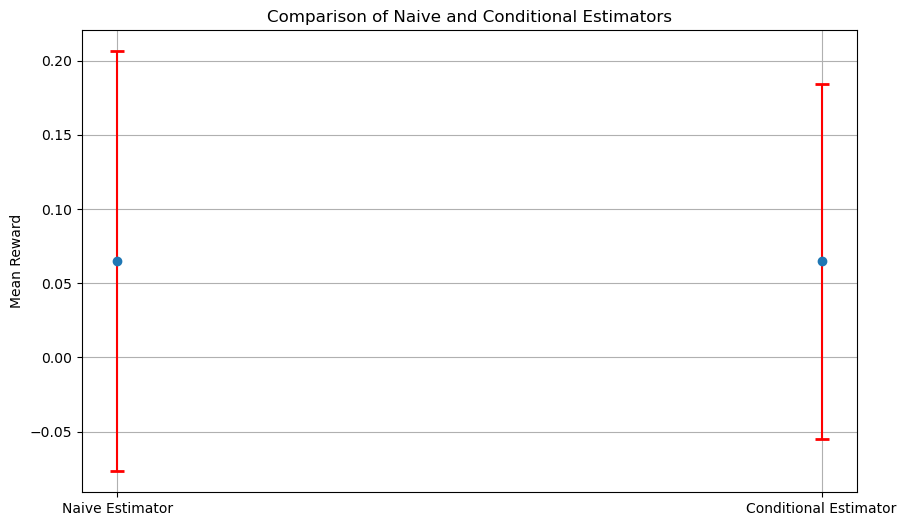

In [5]:
# question c


# Simulation parameters
matrix_size = (5, 6)
alpha, beta = 2, 5
num_steps = 100000  # Number of steps in the simulation

def simulate_naive_estimator(num_steps, matrix_size, alpha, beta):
    matrix = np.zeros(matrix_size, dtype=int)
    rewards = []
    lamp_on_count = 0
    for _ in range(num_steps):
        # Randomly choose a switch to reset
        x, y = random.randint(0, matrix_size[0] - 1), random.randint(0, matrix_size[1] - 1)
        matrix[x][y] = 1 - matrix[x][y]
        if lamp_on_off(matrix) == 'On':
            lamp_on_count += 1
            reward = np.random.beta(alpha, beta)
        else:
            reward = 0
        rewards.append(reward)
    lamp_on_probability = lamp_on_count / num_steps
    return rewards, lamp_on_probability

def simulate_conditional_estimator(num_steps, lamp_on_probability, alpha, beta):
    expected_reward_on = alpha / (alpha + beta)
    conditional_rewards = [expected_reward_on if random.random() < lamp_on_probability else 0 for _ in range(num_steps)]
    return conditional_rewards

# Run naive estimator simulation
naive_rewards, lamp_on_probability = simulate_naive_estimator(num_steps, matrix_size, alpha, beta)
# Run conditional estimator simulation with the same lamp on probability
conditional_rewards = simulate_conditional_estimator(num_steps, lamp_on_probability, alpha, beta)

# Calculating statistics for naive estimator
naive_mean = np.mean(naive_rewards)
naive_variance = np.var(naive_rewards)
naive_mse = np.mean((np.array(naive_rewards) - naive_mean)**2)

# Calculating statistics for conditional estimator
conditional_mean = np.mean(conditional_rewards)
conditional_variance = np.var(conditional_rewards)
conditional_mse = np.mean((np.array(conditional_rewards) - conditional_mean)**2)

# Printing results
print(f"Naive Estimator: Mean = {naive_mean}, Variance = {naive_variance}, MSE = {naive_mse}")
print(f"Conditional Estimator: Mean = {conditional_mean}, Variance = {conditional_variance}, MSE = {conditional_mse}")

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x=['Naive Estimator', 'Conditional Estimator'], 
             y=[naive_mean, conditional_mean], 
             yerr=[np.sqrt(naive_variance), np.sqrt(conditional_variance)], 
             fmt='o', capsize=5, capthick=2, ecolor='red')
plt.title('Comparison of Naive and Conditional Estimators')
plt.ylabel('Mean Reward')
plt.grid(True)
plt.show()


## Simulation Parameters 
- **matrix_size**: The dimensions of the matrix used in the simulation.
- **alpha, beta**: Parameters for the Beta distribution, used to generate random rewards.
- **num_steps**: The number of iterations the simulation will run.

## Naive Estimator Simulation
- **simulate_naive_estimator**: This function simulates a scenario where the state of a random cell in a matrix is toggled between 0 and 1. After each toggle, it checks if there's a path from the first to the last column in the matrix using the `lamp_on_off` function.
   - If the path exists ('On'), a reward is generated from a Beta distribution with parameters `alpha` and `beta`.
   - If not ('Off'), the reward is 0.
   - The function keeps track of the total rewards and the probability of the lamp being 'On'.

## Conditional Estimator Simulation
- **simulate_conditional_estimator**: This function generates rewards based on the previously calculated probability of the lamp being 'On'. It uses the expected reward for the 'On' state (calculated as `alpha / (alpha + beta)`) and generates rewards accordingly.

## Explanation for Lower Variance in Conditional Estimator
The conditional estimator uses a fixed probability to generate rewards. This probability is based on the overall likelihood of the lamp being 'On' across all simulations. Since this probability remains constant throughout the simulation, the rewards generated in each iteration are also more consistent. On the other hand, the naive estimator's rewards are dependent on the actual outcome in each iteration, which introduces more variability due to the randomness of each state change and the variability inherent in the Beta distribution. This difference in approach is what leads to a lower variance in the conditional estimator compared to the naive estimator.

---


***QUESTION D***

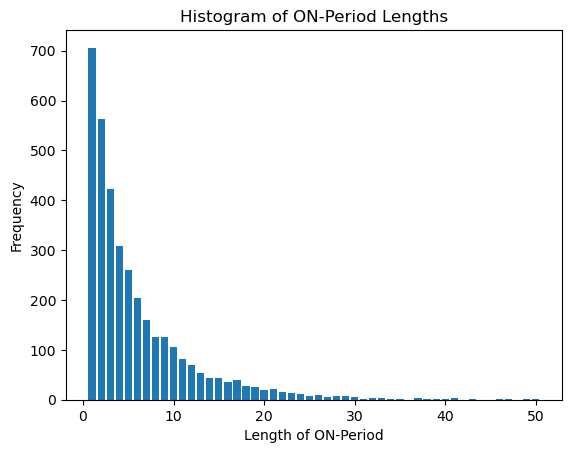

In [6]:
# question d
def simulate_on_periods(num_steps, matrix_size):
    matrix = np.zeros(matrix_size, dtype=int)
    on_periods = []
    on_period_length = 0
    lamp_was_on = False

    for _ in range(num_steps):
        # Randomly choose a switch to reset
        x, y = random.randint(0, matrix_size[0] - 1), random.randint(0, matrix_size[1] - 1)
        matrix[x][y] = 1 - matrix[x][y]

        if lamp_on_off(matrix) == 'On':
            if not lamp_was_on:
                # Lamp just turned on, start a new ON-period
                on_period_length = 1
                lamp_was_on = True
            else:
                # Lamp continues to be on, increase ON-period length
                on_period_length += 1
        else:
            if lamp_was_on:
                # Lamp just turned off, end the current ON-period
                on_periods.append(on_period_length)
                lamp_was_on = False

    return on_periods

# Simulate the ON-periods
num_steps = 100000  #
matrix_size = (5, 6)  
on_periods = simulate_on_periods(num_steps, matrix_size)

# Plotting the histogram of ON-period lengths
plt.hist(on_periods, bins=range(1, max(on_periods)+1), align='left', rwidth=0.8)
plt.title('Histogram of ON-Period Lengths')
plt.xlabel('Length of ON-Period')
plt.ylabel('Frequency')
plt.show()


---

***QUESTION E***

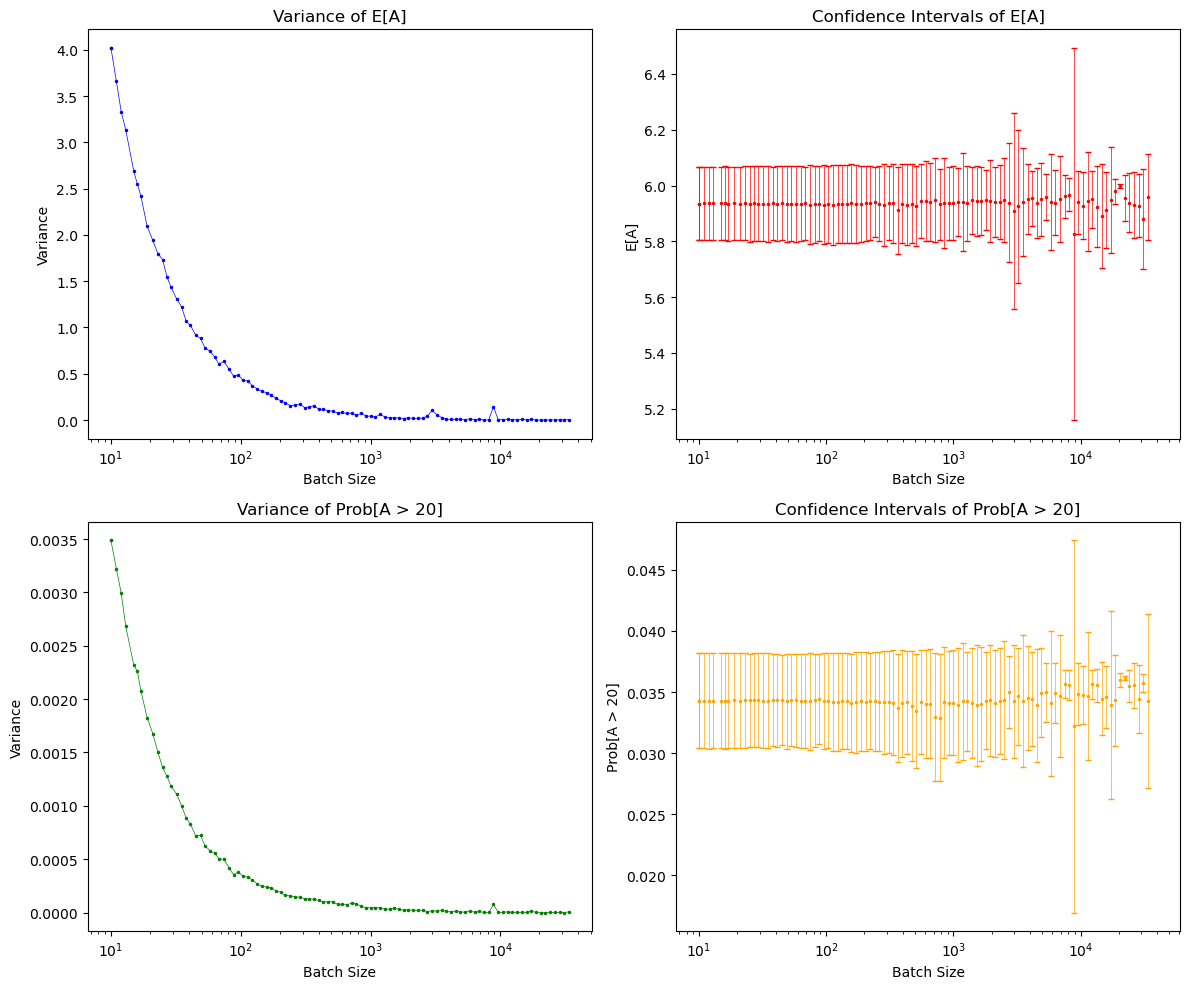

In [8]:
# question d
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def calculate_estimates(on_periods, batch_size):
    if batch_size:
        batch_means_EA = [np.mean(on_periods[i:i + batch_size]) for i in range(0, len(on_periods), batch_size)]
        batch_means_Prob = [np.mean([length > 20 for length in on_periods[i:i + batch_size]]) for i in range(0, len(on_periods), batch_size)]
    else:
        batch_means_EA = [np.mean(on_periods)]
        batch_means_Prob = [np.mean([length > 20 for length in on_periods])]

    EA_estimate = np.mean(batch_means_EA)
    Prob_estimate = np.mean(batch_means_Prob)

    variance_EA = np.var(batch_means_EA, ddof=1) if batch_size else np.var(on_periods, ddof=1)
    variance_Prob = np.var(batch_means_Prob, ddof=1) if batch_size else np.var([length > 20 for length in on_periods], ddof=1)

    ci_EA = stats.norm.interval(0.95, loc=EA_estimate, scale=np.sqrt(variance_EA / len(batch_means_EA)))
    ci_Prob = stats.norm.interval(0.95, loc=Prob_estimate, scale=np.sqrt(variance_Prob / len(batch_means_Prob)))

    return EA_estimate, Prob_estimate, variance_EA, variance_Prob, ci_EA, ci_Prob

# Parameters for the simulation
num_steps = 1000000
matrix_size = (5, 6)
batch_sizes = [int(x) for x in np.logspace(np.log10(10), np.log10(40000), num=100, endpoint=True)]

# Run simulation and gather data
on_periods = simulate_on_periods(num_steps, matrix_size)

# Data for plotting
batch_sizes_plot = []
variances_EA = []
variances_Prob = []
ci_EA_values = []
ci_Prob_values = []

# Analyze results with different batch sizes
for batch_size in batch_sizes:
    EA_estimate, Prob_estimate, variance_EA, variance_Prob, ci_EA, ci_Prob = calculate_estimates(on_periods, batch_size)
    batch_sizes_plot.append(batch_size)
    variances_EA.append(variance_EA)
    variances_Prob.append(variance_Prob)
    ci_EA_values.append(ci_EA)
    ci_Prob_values.append(ci_Prob)

# Plotting

# Adjusting the plot style to make dots and lines smaller
marker_size = 1.5  # Size of the markers
line_width = 0.5   # Width of the lines

plt.figure(figsize=(12, 10))

# Plot for Variance of E[A]
plt.subplot(2, 2, 1)
plt.plot(batch_sizes_plot, variances_EA, marker='o', color='blue', markersize=marker_size, linewidth=line_width)
plt.title('Variance of E[A]')
plt.xlabel('Batch Size')
plt.ylabel('Variance')
plt.xscale('log')


# Plot for Confidence Intervals of E[A]
plt.subplot(2, 2, 2)
plt.errorbar(batch_sizes_plot, [ci[0] for ci in ci_EA_values], yerr=[ci[1] - ci[0] for ci in ci_EA_values], fmt='o', color='red', markersize=marker_size, elinewidth=line_width, capsize=2)
plt.title('Confidence Intervals of E[A]')
plt.xlabel('Batch Size')
plt.ylabel('E[A]')
plt.xscale('log')


# Plot for Variance of Prob[A > 20]
plt.subplot(2, 2, 3)
plt.plot(batch_sizes_plot, variances_Prob, marker='o', color='green', markersize=marker_size, linewidth=line_width)
plt.title('Variance of Prob[A > 20]')
plt.xlabel('Batch Size')
plt.ylabel('Variance')
plt.xscale('log')


# Plot for Confidence Intervals of Prob[A > 20]
plt.subplot(2, 2, 4)
plt.errorbar(batch_sizes_plot, [ci[0] for ci in ci_Prob_values], yerr=[ci[1] - ci[0] for ci in ci_Prob_values], fmt='o', color='orange', markersize=marker_size, elinewidth=line_width, capsize=2)
plt.title('Confidence Intervals of Prob[A > 20]')
plt.xlabel('Batch Size')
plt.ylabel('Prob[A > 20]')
plt.xscale('log')
plt.tight_layout()
plt.show()




**Optimal Batch Size**:  
This is at the point just before the confidence intervals start to widen significantly. From the plots, it appears this happens as the batch size moves into the hundreds. You would look for the "elbow" in the variance plot—a point where the variance levels off.

**Stable Confidence Intervals**:  
Ideally, you want to select a batch size where the confidence intervals are relatively stable and don't show wide fluctuations as seen in the latter part of the plots. Larger batch sizes result in fewer batches, making each batch's impact on the variance estimate more significant. This can lead to more fluctuation in confidence intervals due to less reliable variance estimates from the reduced number of batches.

**Conclusion**:  
In a simulation with 1,000,000 steps, a batch size of 500 is optimal. It minimizes variance while preventing a significant increase in the width of confidence intervals, ensuring precise and stable estimations.



In [10]:
# question e

# Parameters
num_steps = 1000000  # Adjust for a more precise estimation
matrix_size = (5, 6)
batch_size = 500  # Determine a suitable batch size

# Simulation
on_periods = simulate_on_periods(num_steps, matrix_size)
batch_means_EA = [np.mean(on_periods[i:i + batch_size]) for i in range(0, len(on_periods), batch_size)]
batch_means_Prob = [np.mean([length > 20 for length in on_periods[i:i + batch_size]]) for i in range(0, len(on_periods), batch_size)]

# Estimations
EA_estimate = np.mean(batch_means_EA)
Prob_estimate = np.mean(batch_means_Prob)

# Variance and Confidence Intervals
variance_EA = np.var(batch_means_EA, ddof=1)
variance_Prob = np.var(batch_means_Prob, ddof=1)
ci_EA = stats.norm.interval(0.95, loc=EA_estimate, scale=np.sqrt(variance_EA/len(batch_means_EA)))
ci_Prob = stats.norm.interval(0.95, loc=Prob_estimate, scale=np.sqrt(variance_Prob/len(batch_means_Prob)))

# Output results
print(f"Estimated E[A]: {EA_estimate} with 95% CI: {ci_EA}")
print(f"Estimated Prob[A > 20]: {Prob_estimate} with 95% CI: {ci_Prob}")

Estimated E[A]: 5.979556215186162 with 95% CI: (5.913529586950744, 6.04558284342158)
Estimated Prob[A > 20]: 0.03698292289651128 with 95% CI: (0.034949257520901895, 0.03901658827212067)


---

***QUESTION F***

In [ ]:
# question f
# Simulation parameters
num_steps = 100000
matrix_size = (5, 6)

# Run simulation
on_periods = simulate_on_periods(num_steps, matrix_size)

# Analyze consecutive ON-period lengths
if len(on_periods) > 1:
    An = on_periods[:-1]  # Lengths of nth ON-period
    An_plus_1 = on_periods[1:]  # Lengths of (n+1)th ON-period

    # Calculate covariance
    covariance = np.cov(An, An_plus_1)[0, 1]

    print(f"Covariance between consecutive ON-periods: {covariance}")

    # Check for independence (Covariance close to zero)
    if np.isclose(covariance, 0, atol=1e-3):
        print("The sequence An may form a Markov chain (based on covariance analysis).")
    else:
        print("The sequence An may not form a Markov chain (based on covariance analysis).")
else:
    print("Not enough data for analysis.")
